# Import all depedencies 

In [2]:
!pip install git+https://github.com/forrestbao/pyeeg.git
!pip install pyrenn

  Cloning https://github.com/forrestbao/pyeeg.git to /tmp/pip-req-build-rqhsde85
  Running command git clone -q https://github.com/forrestbao/pyeeg.git /tmp/pip-req-build-rqhsde85
  Created wheel for pyeeg: filename=pyeeg-0.4.4-py2.py3-none-any.whl size=28123 sha256=90288799e6b63a967aae45f5e5b6a7c9f89b8fc57777865913177b5629f21753
  Stored in directory: /tmp/pip-ephem-wheel-cache-fznz2_t6/wheels/2d/3f/ad/106d4fc80b61d1ea1fc18e76e7439fd98aa043d83d58eae741
Successfully built pyeeg
  Created wheel for pyrenn: filename=pyrenn-0.1-cp37-none-any.whl size=9259 sha256=1b843804f2eb4240c56085354d904f2ee185b7fc03ae010a5104546af19db7ba
  Stored in directory: /root/.cache/pip/wheels/91/ed/b6/ab8600223e6ec9cea9592f0cf6e32db7abb4c2cc4c30b90eac
Successfully built pyrenn


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import sleep
import os
import pyeeg
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 
%matplotlib inline


# Download Dataset

In [4]:
!wget http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/Z.zip
!wget http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/O.zip
!wget http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/N.zip
!wget http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/F.zip
!wget http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/S.zip

!mkdir './Non-Seizure'
!mkdir './Non-Seizure/Set A'
!mkdir './Non-Seizure/Set B'
!mkdir './Non-Seizure/Set C'
!mkdir './Non-Seizure/Set D'

!mkdir './Seizure'
!mkdir './Seizure/Set E'

!unzip Z.zip -d './Non-Seizure/Set A'
!unzip O.zip -d './Non-Seizure/Set B'
!unzip N.zip -d './Non-Seizure/Set C'
!unzip F.zip -d './Non-Seizure/Set D'
!unzip S.zip -d './Seizure/Set E'  

--2021-03-04 01:43:30--  http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/Z.zip
Resolving epileptologie-bonn.de (epileptologie-bonn.de)... 83.169.36.208
Connecting to epileptologie-bonn.de (epileptologie-bonn.de)|83.169.36.208|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 578047 (564K) [application/zip]
Saving to: ‘Z.zip’

Z.zip               100%[===================>] 564.50K   654KB/s    in 0.9s    

2021-03-04 01:43:31 (654 KB/s) - ‘Z.zip’ saved [578047/578047]

--2021-03-04 01:43:31--  http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/O.zip
Resolving epileptologie-bonn.de (epileptologie-bonn.de)... 83.169.36.208
Connecting to epileptologie-bonn.de (epileptologie-bonn.de)|83.169.36.208|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 625970 (611K) [application/zip]
Saving to: ‘O.zip’

O.zip               100%[===================>] 611.30K   632KB/s    in 1.0s    

2021-03-04 01:43:32 (632 KB/s) - ‘O.zip’ saved [62

# Load files from folders 

In [5]:
# import each and every file

dirA="./Non-Seizure/Set A/"
tempA = []
for file in os.listdir(dirA):
    fl = dirA + file
    tempA.append(fl)
tempA = sorted(tempA)          # class: 0     val:  0

dirB="./Non-Seizure/Set B/"
tempB = []
for file in os.listdir(dirB):
    fl = dirB + file
    tempB.append(fl)
tempB = sorted(tempB)          # class: 0     val:  0

dirC="./Non-Seizure/Set C/"
tempC = []
for file in os.listdir(dirC):
    fl = dirC + file
    tempC.append(fl)
tempC = sorted(tempC)          # class:0       val: 0
    
dirD="./Non-Seizure/Set D/"
tempD = []
for file in os.listdir(dirD):
    fl = dirD + file
    tempD.append(fl)
tempD = sorted(tempD)          # class: 0        val: 0

dirE="./Seizure/Set E/"
tempE = []
for file in os.listdir(dirE):
    fl = dirE + file
    tempE.append(fl)
tempE = sorted(tempE)          # class: 1     val:  1

# create small tables 

In [6]:
ta=[]
st = 'A'
for i in range(len(tempA)):
    x = pd.read_csv(tempA[i],header=None)
    x.columns=[st+str(i)]
    ta.append(x)

tb=[]
st = 'A'
for i in range(len(tempB)):
    x = pd.read_csv(tempB[i],header=None)
    x.columns=[st+str(i)]
    tb.append(x)

td=[]
st = 'A'
for i in range(len(tempD)):
    x = pd.read_csv(tempD[i],header=None)
    x.columns=[st+str(i)]
    td.append(x)
    
tc=[]
st = 'A'
for i in range(len(tempC)):
    x = pd.read_csv(tempC[i],header=None)
    x.columns=[st+str(i)]
    tc.append(x)
    
te=[]
st = 'A'
for i in range(len(tempE)):
    x = pd.read_csv(tempE[i],header=None)
    x.columns=[st+str(i)]
    te.append(x)

# make big table

In [7]:
def table(table):
    big_table = None
    for ta in table:
        big_table = pd.concat([big_table, ta],axis=1)
    return big_table

In [8]:
bigA = table(ta)
bigB = table(tb)
bigC = table(tc)
bigD = table(td)
bigE = table(te)

head = list(bigE.columns.values)

In [9]:
len(bigB.columns)

100

# creat sub matrix for each

In [10]:
# creat a matrix
def creat_mat(mat):
    matx = np.zeros((len(mat),(len(head))))
    for i in range(len(head)):
        matx[:,i] = mat[head[i]]
        sleep(0.01)
    return matx
# every mat contain probs mat[:,i] total 28 start form mat1

In [11]:
matA = creat_mat(bigA)
matB = creat_mat(bigB) # : refers to NON-SEIZURE
matC = creat_mat(bigC)
matD = creat_mat(bigD)
matE = creat_mat(bigE) # :  refers to SEIZURES

matA = np.nan_to_num(matA)
matB = np.nan_to_num(matB) # matB[:,0] --- > channel 0, matB[:,1] --- > channel 1 like that
matC = np.nan_to_num(matC)
matD = np.nan_to_num(matD)
matE = np.nan_to_num(matE)

# 4097 data point per channel 
# 173.61 Hz sample rate and there are 4097 data point for each channel
# total 100 channel are their
# 4097/173.61 = 23.59 sec 
# the raw data from one of the channels for the 23.59 sec

# 7- Features

# (DFA,HFD,SVD_Entropy, Spectral_Entropy, Fisher_Information,PFD, mean)

In [12]:
pip install nolds

In [13]:
# source: https://www.hindawi.com/journals/cin/2011/406391/

import nolds
def features(mat):
    Kmax = 5
    Tau  = 4
    DE   = 10
    M    = 10
    R    = 0.3
    Band = np.arange(1,86)
    Fs   = 173
    DFA                = pyeeg.dfa(mat)
    HFD                = pyeeg.hfd(mat,Kmax)
    SVD_Entropy        = pyeeg.svd_entropy(mat,Tau,DE)
    Fisher_Information = pyeeg.fisher_info(mat,Tau,DE)
    #ApEn               = pyeeg.ap_entropy(mat, M, R)      # too slow 
    p , p_ratio = pyeeg.bin_power(mat, Band, Fs)
    Spectral_Entropy   = pyeeg.spectral_entropy(mat, Band, Fs, Power_Ratio=p_ratio)
    PFD                = pyeeg.pfd(mat)
    #hurst              = pyeeg.hurst(mat)   # produce infinity results 
    #correlation        = nolds.corr_dim(mat,1) # too slow
    mean               = np.mean(mat)
    #standard_dev       = np.std(mat)

    #F = np.fft.fft(mat)
    #P = F * np.conjugate(F)
    #Power = sum(P)

    sleep(0.01)
    
    return (DFA, HFD, SVD_Entropy , Spectral_Entropy, Fisher_Information, PFD, mean)

# Compute the features of datasets

In [14]:
# this is three classification proble
# class1: healthy
# class2: transition
# class3: dieases

In [15]:
# create features of class I
f1_A    = np.zeros((100,1))
f2_A    = np.zeros((100,1))
f3_A    = np.zeros((100,1))
f4_A    = np.zeros((100,1))
f5_A    = np.zeros((100,1))
f6_A    = np.zeros((100,1))
f7_A    = np.zeros((100,1))

cl_A    = np.zeros((100,1)) # 0


for i in range(100):
    [f1_A[i,0],f2_A[i,0],f3_A[i,0],f4_A[i,0],f5_A[i,0],f6_A[i,0],f7_A[i,0]]=features(matA[:,i])
    

/usr/local/lib/python3.7/dist-packages/pyeeg/detrended_fluctuation_analysis.py:125: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  F[i] += numpy.linalg.lstsq(c, y)[1]
/usr/local/lib/python3.7/dist-packages/pyeeg/detrended_fluctuation_analysis.py:131: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  ).T, numpy.log(F))[0][0]
/usr/local/lib/python3.7/dist-packages/pyeeg/fractal_dimension.py:22: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matr

In [16]:
# create features of class I
f1_B    = np.zeros((100,1))
f2_B    = np.zeros((100,1))
f3_B    = np.zeros((100,1))
f4_B    = np.zeros((100,1))
f5_B    = np.zeros((100,1))
f6_B    = np.zeros((100,1))
f7_B    = np.zeros((100,1))

cl_B    = np.zeros((100,1)) # 0


for i in range(100):
    [f1_B[i,0],f2_B[i,0],f3_B[i,0],f4_B[i,0],f5_B[i,0],f6_B[i,0],f7_B[i,0]]=features(matB[:,i])
    

/usr/local/lib/python3.7/dist-packages/pyeeg/detrended_fluctuation_analysis.py:125: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  F[i] += numpy.linalg.lstsq(c, y)[1]
/usr/local/lib/python3.7/dist-packages/pyeeg/detrended_fluctuation_analysis.py:131: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  ).T, numpy.log(F))[0][0]
/usr/local/lib/python3.7/dist-packages/pyeeg/fractal_dimension.py:22: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matr

In [17]:
# create features of class II
f1_C    = np.zeros((100,1))
f2_C    = np.zeros((100,1))
f3_C    = np.zeros((100,1))
f4_C    = np.zeros((100,1))
f5_C    = np.zeros((100,1))
f6_C    = np.zeros((100,1))
f7_C    = np.zeros((100,1))
cl_C    = np.zeros((100,1)) # transition means 0

for i in range(100):
    [f1_C[i,0],f2_C[i,0],f3_C[i,0],f4_C[i,0],f5_C[i,0] , f6_C[i,0], f7_C[i,0]]=features(matC[:,i])
    

/usr/local/lib/python3.7/dist-packages/pyeeg/detrended_fluctuation_analysis.py:125: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  F[i] += numpy.linalg.lstsq(c, y)[1]
/usr/local/lib/python3.7/dist-packages/pyeeg/detrended_fluctuation_analysis.py:131: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  ).T, numpy.log(F))[0][0]
/usr/local/lib/python3.7/dist-packages/pyeeg/fractal_dimension.py:22: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matr

In [18]:
# create features of class II
f1_D    = np.zeros((100,1))
f2_D    = np.zeros((100,1))
f3_D    = np.zeros((100,1))
f4_D    = np.zeros((100,1))
f5_D    = np.zeros((100,1))
f6_D    = np.zeros((100,1))
f7_D    = np.zeros((100,1))
cl_D    = np.zeros((100,1)) #  0

for i in range(100):
    [f1_D[i,0],f2_D[i,0],f3_D[i,0],f4_D[i,0],f5_D[i,0] , f6_D[i,0], f7_D[i,0]]=features(matD[:,i])
    


/usr/local/lib/python3.7/dist-packages/pyeeg/detrended_fluctuation_analysis.py:125: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  F[i] += numpy.linalg.lstsq(c, y)[1]
/usr/local/lib/python3.7/dist-packages/pyeeg/detrended_fluctuation_analysis.py:131: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  ).T, numpy.log(F))[0][0]
/usr/local/lib/python3.7/dist-packages/pyeeg/fractal_dimension.py:22: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matr

In [19]:
# create features of class III
f1_E    = np.zeros((100,1))
f2_E    = np.zeros((100,1))
f3_E    = np.zeros((100,1))
f4_E    = np.zeros((100,1))
f5_E    = np.zeros((100,1)) 
f6_E    = np.zeros((100,1)) 
f7_E    = np.zeros((100,1))
cl_E    = np.ones((100,1)) #Seizure 1

for i in range(100):
    [f1_E[i,0],f2_E[i,0],f3_E[i,0],f4_E[i,0],f5_E[i,0] , f6_E[i,0], f7_E[i,0]]=features(matE[:,i])

/usr/local/lib/python3.7/dist-packages/pyeeg/detrended_fluctuation_analysis.py:125: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  F[i] += numpy.linalg.lstsq(c, y)[1]
/usr/local/lib/python3.7/dist-packages/pyeeg/detrended_fluctuation_analysis.py:131: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  ).T, numpy.log(F))[0][0]
/usr/local/lib/python3.7/dist-packages/pyeeg/fractal_dimension.py:22: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matr

# create Feature and class matrix for each Classes

In [28]:
MftB = np.concatenate([f1_B,f2_B,f3_B,f4_B,f5_B, f6_B, f7_B, cl_B],axis=1)
MftA = np.concatenate([f1_A,f2_A,f3_A,f4_A,f5_A, f6_A, f7_A, cl_A],axis=1)
MftD = np.concatenate([f1_D,f2_D,f3_D,f4_D,f5_D, f6_D, f7_D, cl_D],axis=1)
MftC = np.concatenate([f1_C,f2_C,f3_C,f4_C,f5_C, f6_C, f7_C, cl_C],axis=1)
MftNS= np.concatenate([MftA, MftB, MftC, MftD])
MftE = np.concatenate([f1_E,f2_E,f3_E,f4_E,f5_E, f6_E, f7_E, cl_E],axis=1)
MftS = MftE

In [21]:
FCM_B = pd.DataFrame(MftB,columns=['f1','f2','f3','f4','f5', 'f6', 'f7', 'class'])
FCM_C = pd.DataFrame(MftC,columns=['f1','f2','f3','f4','f5', 'f6', 'f7', 'class'])
FCM_E = pd.DataFrame(MftE,columns=['f1','f2','f3','f4','f5', 'f6', 'f7', 'class'])
FCM_A = pd.DataFrame(MftA,columns=['f1','f2','f3','f4','f5', 'f6', 'f7', 'class'])
FCM_D = pd.DataFrame(MftD,columns=['f1','f2','f3','f4','f5', 'f6', 'f7', 'class'])
FCM_B.head(4)

,f1,f2,f3,f4,f5,f6,f7,class
0,0.887621,0.185875,2.299474,0.805990,2.299474,0.581396,5.156944,0.0
1,0.783744,0.163794,2.299480,0.791770,2.299480,0.588340,8.333659,0.0
2,0.875873,0.154714,2.299477,0.777106,2.299477,0.589802,-3.067122,0.0
3,0.881293,0.138396,2.299481,0.777891,2.299481,0.592911,8.916524,0.0


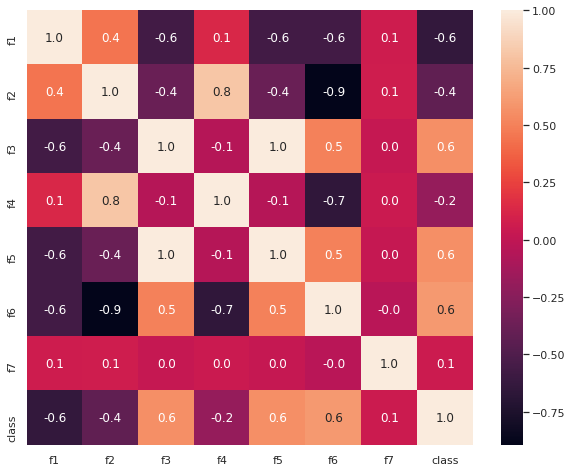

In [22]:
import seaborn as sbn
sbn.set(style="whitegrid", palette="muted")
TotalDataset = pd.concat([FCM_A,FCM_B,FCM_C,FCM_D,FCM_E,],ignore_index=False)
TotalDataset[200:300]
plt.figure(figsize=(10,8))
sbn.heatmap(TotalDataset.corr(), annot=True, fmt=".1f")

We can see that features 2 and 6 (HFD and PFD) are highly correlated (linearly) with a correlation factor of -0.9. Also features 2 and 4 (HFD and Spectral Entropy) are correlated with a factor of 0.8. Therefore, it is possible to remove feature 2 from feature space, without much effect on the accuracy.

In practice, I realized that removing feature 2 from feature space will reduce the performance of Quadratic Discriminant Analysis by 10 percent while increasing RBF SVM by 2 percent.

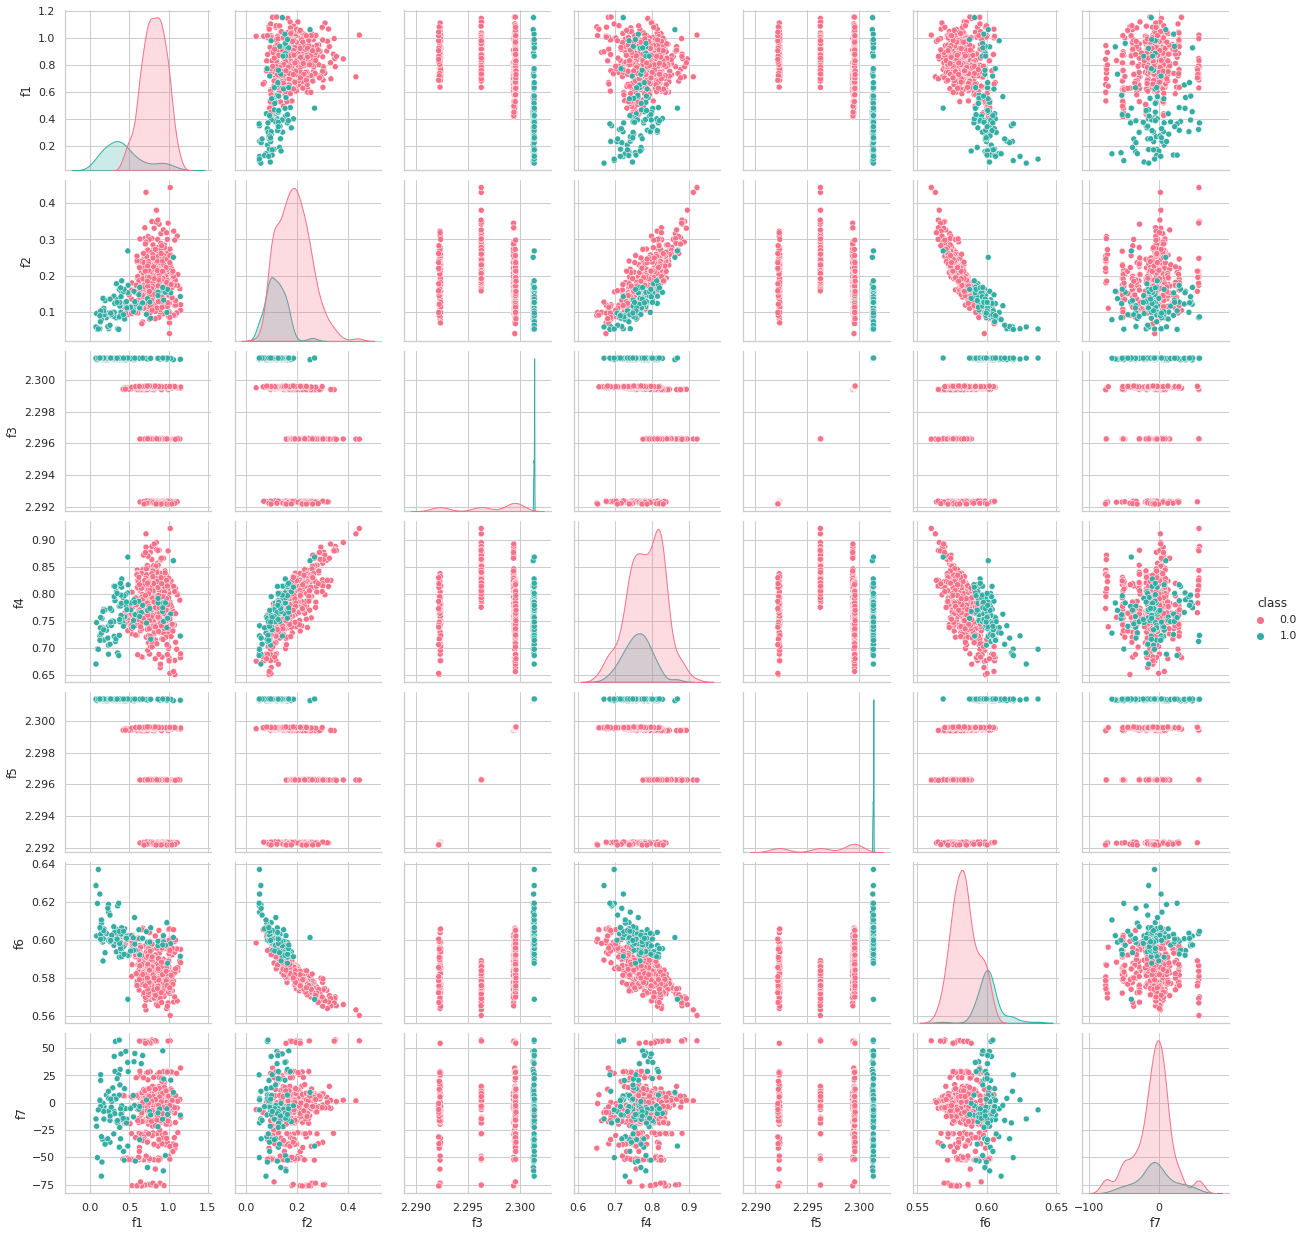

In [24]:
sbn.pairplot(TotalDataset, hue='class', palette="husl")

## KRUSKAL-WALLIS H-TEST 

In [38]:

H = []
pval = []
from scipy.stats import mstats

for i in range(0, 8 , 7):

  print("Kruskal Wallis H-test test:")
  h, p = mstats.kruskalwallis(MftNS[:,i], MftS[:,i])
  H.append(h)
  pval.append(p)
  if  pval[int(i/7)] < 0.05:
      print("Reject NULL hypothesis - Significant differences exist between groups.")
  if  pval[int(i/7)] > 0.05:
      print("Accept NULL hypothesis - No significant difference between groups.")

H = np.array(H)
pval = np.array(pval)

Kruskal Wallis H-test test:
Reject NULL hypothesis - Significant differences exist between groups.
Kruskal Wallis H-test test:
Reject NULL hypothesis - Significant differences exist between groups.


# Split arrays or matrices into random train and test subsets

In [37]:
from sklearn.model_selection import train_test_split

In [40]:
X = TotalDataset[['f1','f2','f3','f4','f5', 'f6']]
y = TotalDataset[['class']]
X = np.asarray(X)
y = np.asarray(y)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# apply machine learning 

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [43]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

In [44]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]


Nearest Neighbors
confusion matrix:
[[76  0]
 [ 2 22]]
accuracy: 0.98


Linear SVM
confusion matrix:
[[76  0]
 [ 5 19]]
accuracy: 0.95


RBF SVM
confusion matrix:
[[76  0]
 [ 4 20]]
accuracy: 0.96


Gaussian Process
confusion matrix:
[[76  0]
 [ 0 24]]
accuracy: 1.0


Decision Tree
confusion matrix:
[[76  0]
 [ 0 24]]
accuracy: 1.0


Random Forest
confusion matrix:
[[76  0]
 [ 0 24]]
accuracy: 1.0


Neural Net
confusion matrix:
[[76  0]
 [ 2 22]]
accuracy: 0.98


AdaBoost
confusion matrix:
[[76  0]
 [ 0 24]]
accuracy: 1.0


Naive Bayes
confusion matrix:
[[76  0]
 [ 1 23]]
accuracy: 0.99


QDA
confusion matrix:
[[76  0]
 [ 7 17]]
accuracy: 0.93




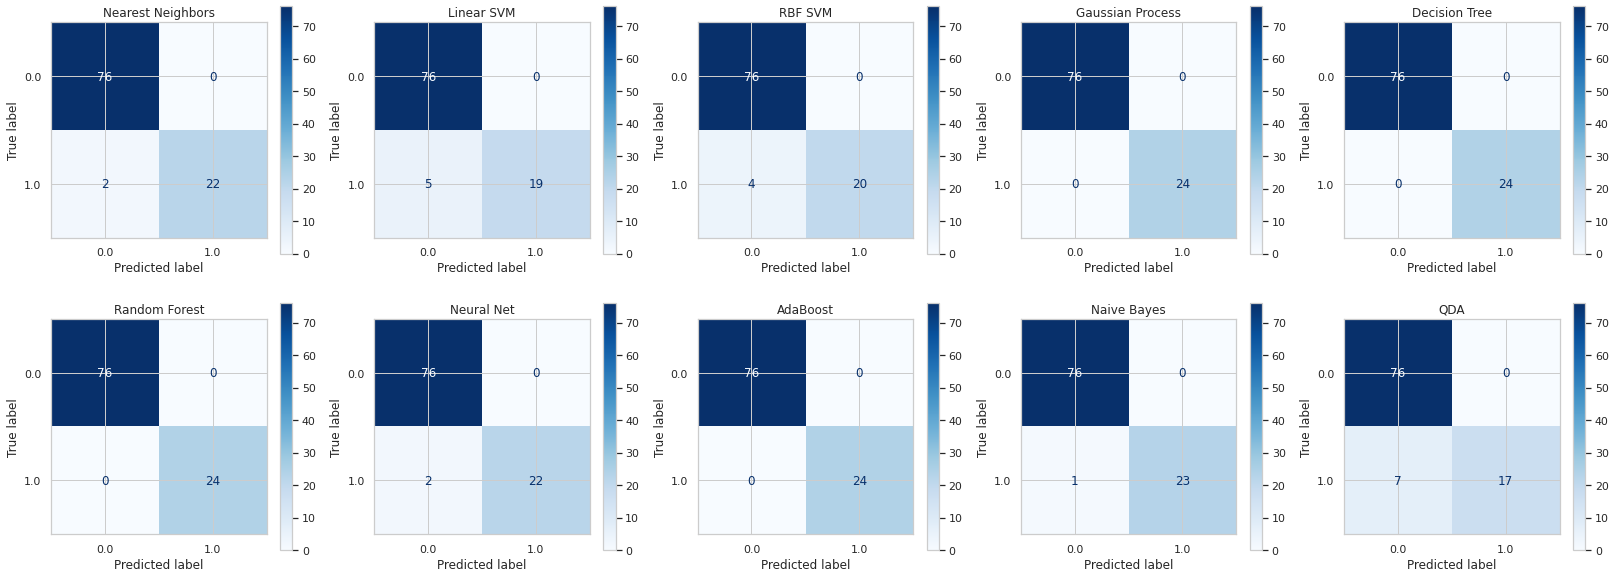

In [73]:
from sklearn.metrics import plot_confusion_matrix

clf_score=[]
class_set = ['Seizure' , 'Non-seizure']

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(28,10))
from sklearn.metrics import confusion_matrix, accuracy_score
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    i=0
    for name, clf in zip(names, classifiers):

        clf.fit(X_train, y_train)
        y_predict = clf.predict(X_test)
        score = clf.score(X_test, y_test)
        clf_score.append([score,name])
        cm_tf = confusion_matrix(y_test ,y_predict)
        ax = axes.flatten()[i]
        disp = plot_confusion_matrix(clf, X_test, y_test, ax= ax,  cmap='Blues')
        ax.title.set_text(str(name))
        
        i+=1
        print(name)
        print('confusion matrix:')
        print(cm_tf)
        print('accuracy:', score)
        print('\n')

# ROC Curves

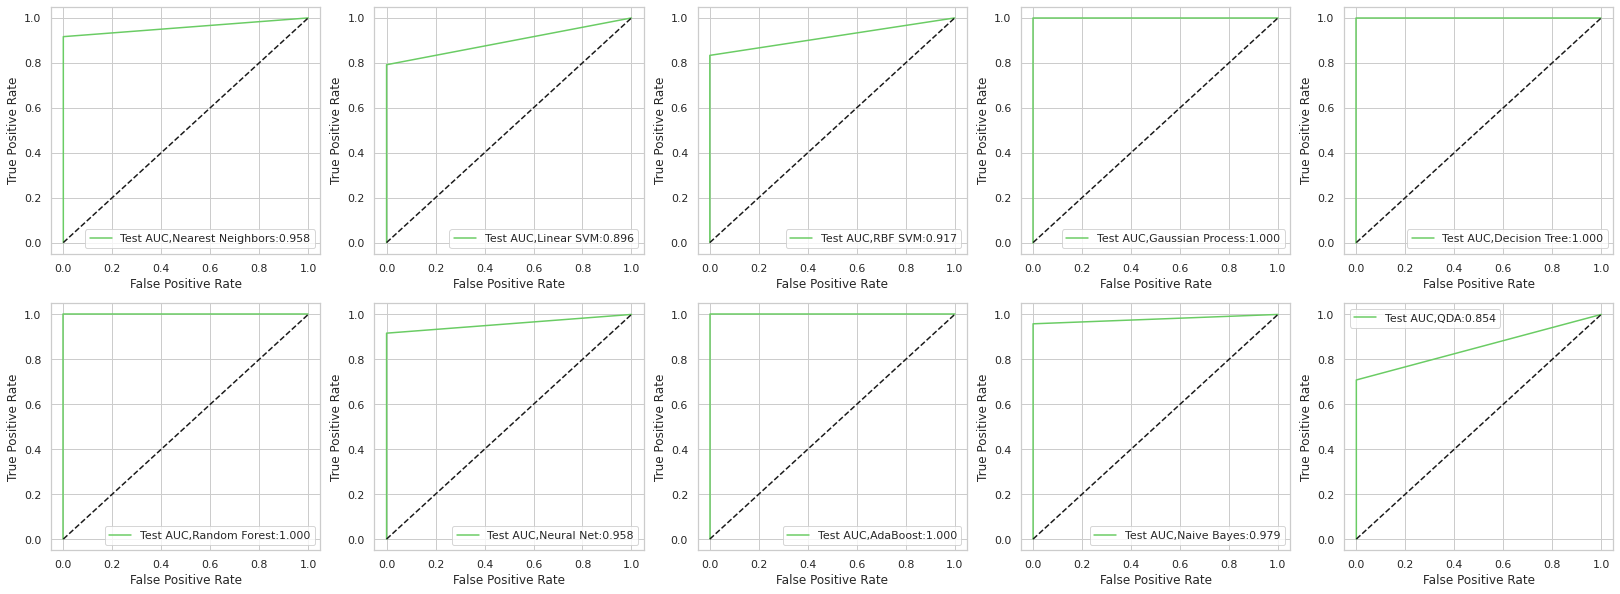

In [75]:
from sklearn.metrics import roc_curve, roc_auc_score
plt.figure(figsize=(28,10))
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    i= 0
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        y_predict = clf.predict(X_test)
        fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_predict)
        auc_test = roc_auc_score(y_test, y_predict)
        plt.subplot(2, 5, i+1)
        plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC,'+ str(name)+ ':%.3f'%auc_test)
        plt.plot([0,1],[0,1],'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        i+=1
plt.show()

In [46]:
#Printing only accuracy
clf_score

[[0.98, 'Nearest Neighbors'],
 [0.95, 'Linear SVM'],
 [0.96, 'RBF SVM'],
 [1.0, 'Gaussian Process'],
 [1.0, 'Decision Tree'],
 [1.0, 'Random Forest'],
 [0.98, 'Neural Net'],
 [1.0, 'AdaBoost'],
 [0.99, 'Naive Bayes'],
 [0.93, 'QDA']]

# **Best models are Gaussian Process, Decision Tree, Random Forest, and AdaBoost with 100% accuracy and then Naive Bayes with 99% accuracy**.

In this notebook, discrete wavelet transformation is not applied to EEG signals. 

7 Features: DFA(Detrended Fluctuation Analysis), HFD(Hjorth Fractal Dimension),SVD Entropy, Spectral Entropy, Fisher Information, PFD (Petrosian Fractal Dimension), and mean; are computed directly on the EEG Signals.